# Project 4: Clustering

Data set: Netflix Prize - https://www.kaggle.com/netflix-inc/netflix-prize-data?select=combined_data_4.txt

Contains information about users and the ratings that they gave to certain films. Separated in multiple csvs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv('netflix/combined_data_all.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

Note: the format of the ratings file is grouped by movie id. Each row with a movie ID will have a null rating following it. There are 17770 movie's provided so that should be the number of nulls.

In [4]:
ratings['Rating'].isna().sum()

17770

In [5]:
ratings.shape

(100498277, 2)

100 millions rows :O 

In [6]:
ratings.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [7]:
ratings.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [8]:
movie_count = ratings['Rating'].isnull().sum()
cust_count = ratings['Cust_Id'].nunique() - movie_count
ratings_count = ratings['Cust_Id'].count() - movie_count

In [9]:
print("Number of movies:\t\t", movie_count)
print("Number of unique customers:\t", cust_count)
print("Total number of ratings:\t", ratings_count)

Number of movies:		 17770
Number of unique customers:	 480189
Total number of ratings:	 100480507


In [10]:
ratings_grouped = ratings.groupby('Rating')['Rating'].agg(['count'])

In [11]:
ratings_grouped

,count
Rating,
1.0,4617990
2.0,10132080
3.0,28811247
4.0,33750958
5.0,23168232


[Text(0.5, 1.0, 'Distribution of Ratings')]

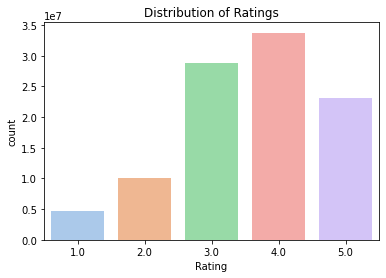

In [12]:
sns.barplot(data = ratings_grouped, y = 'count', x = ratings_grouped.index, palette = 'pastel').set(title = 'Distribution of Ratings')

In [13]:
#import movie titles csv
#encoding: ISO-8859-15
#movies = pd.read_csv('netflix/movie_titles.csv', encoding = 'iso8859_15', header=None )

In [13]:
movies = pd.DataFrame(pd.isnull(ratings.Rating))
movies = movies[movies['Rating'] == True]
movies = movies.reset_index()
movies = movies.drop(columns='Rating')

In [15]:
movies

,index
0,0
1,548
2,694
3,2707
4,2850
...,...
17765,100488431
17766,100489037
17767,100489242
17768,100490605


In [14]:
movie_rows = movies['index']
movie_rows = np.array(movie_rows, dtype = np.int64)

In [18]:
movie_rows

array([        0,       548,       694, ..., 100489242, 100490605,
       100497355])

In [15]:
ratings.drop(index=movie_rows, axis=0, inplace=True)

In [17]:
ratings.head()

,Cust_Id,Rating
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0


In [27]:
ratings = ratings.astype('uint32')

In [28]:
ratings.dtypes

Cust_Id    uint32
Rating     uint32
dtype: object

In [29]:
pd.DataFrame(movie_rows).head()

,0
0,0
1,548
2,694
3,2707
4,2850


In [30]:
#fast way to get movie id for each row
'''
FIX SIZE OF NEW_ROWS ARRAY
'''
new_rows = np.empty(ratings_count, dtype='int64')
count = 0
temp = 0
for i in movie_rows:
    new_rows[temp:i] = count 
    temp = i
    count = count + 1

In [19]:
print(new_rows[100480506])

17764


In [24]:
pd.DataFrame(new_rows).iloc[690:700]

,0
690,2
691,2
692,2
693,2
694,3
695,3
696,3
697,3
698,3
699,3


In [20]:
len(new_rows)

100480507

In [61]:
ratings_count

100480507

In [97]:
movie_count

17770

In [101]:
pd.DataFrame(movie_rows).tail()

,0
17765,100488431
17766,100489037
17767,100489242
17768,100490605
17769,100497355
